<a href="https://colab.research.google.com/github/Hammad-Khan-aka-Ansar-Malik/DataScience-MLprojects/blob/main/Copy_of_LFD_Science_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas_datareader import DataReader
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving API_PAK_DS2_en_csv_v2_49967.csv to API_PAK_DS2_en_csv_v2_49967.csv
Saving listings.xlsx to listings (1).xlsx


In [ ]:
listings=pd.read_excel('listings.xlsx')

# Set Stock Symbol as the index

listings_ss = listings.set_index('Symbol')

# Get ticker of 3 largest finance companies
top_3_companies = listings_ss.loc[listings_ss.Sector == 'Finance', 'IPOyear'].nlargest(n=3)

# Convert index to list
top_3_tickers = top_3_companies.index.tolist()

# Set start date
start = date(2015, 1, 1)

# Import stock data
result = DataReader(top_3_tickers, 'yahoo', start)
data = pd.DataFrame()
for ticker in result.columns.levels[1]:
    index = pd.MultiIndex.from_arrays([
            [ticker] * len(result),
            result.index.values
            ], names=['ticker', 'date'])
    ticker_df = pd.DataFrame(index=index)
    for col in result.columns.levels[0]:
        ticker_df[col] = result[col][ticker].values
    data = pd.concat([data, ticker_df])

# Unstack and inspect result
data['Close'].unstack().info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, AFGB to MGR
Data columns (total 86 columns):
2019-03-25 00:00:00    1 non-null float64
2019-03-26 00:00:00    1 non-null float64
2019-03-27 00:00:00    1 non-null float64
2019-03-28 00:00:00    1 non-null float64
2019-03-29 00:00:00    1 non-null float64
2019-04-01 00:00:00    1 non-null float64
2019-04-02 00:00:00    1 non-null float64
2019-04-03 00:00:00    1 non-null float64
2019-04-04 00:00:00    1 non-null float64
2019-04-05 00:00:00    1 non-null float64
2019-04-08 00:00:00    1 non-null float64
2019-04-09 00:00:00    1 non-null float64
2019-04-10 00:00:00    1 non-null float64
2019-04-11 00:00:00    1 non-null float64
2019-04-12 00:00:00    1 non-null float64
2019-04-15 00:00:00    1 non-null float64
2019-04-16 00:00:00    1 non-null float64
2019-04-17 00:00:00    1 non-null float64
2019-04-18 00:00:00    1 non-null float64
2019-04-22 00:00:00    1 non-null float64
2019-04-23 00:00:00    1 non-null float64
2019-04-24 00:00:

In [ ]:
mx = pd.read_excel('listings.xlsx',sheet_name='amex',na_values=('n/a','$M'))

In [ ]:
mx

,Symbol,Name,LastSale,MarketCap,ADR TSO,IPOyear,Sector,Industry,Summary Quote
0,XXII,"22nd Century Group, Inc",1.9600,2.443336e+08,NaN,NaN,Consumer Non-Durables,Farming/Seeds/Milling,https://www.nasdaq.com/symbol/xxii
1,FAX,Aberdeen Asia-Pacific Income Fund Inc,4.2600,1.060018e+09,NaN,1986.0,NaN,NaN,https://www.nasdaq.com/symbol/fax
2,IAF,Aberdeen Australia Equity Fund Inc,5.4500,1.239457e+08,NaN,NaN,NaN,NaN,https://www.nasdaq.com/symbol/iaf
3,AEF,"Aberdeen Emerging Markets Equity Income Fund, ...",7.4600,3.786083e+08,NaN,NaN,NaN,NaN,https://www.nasdaq.com/symbol/aef
4,FCO,"Aberdeen Global Income Fund, Inc.",8.4400,7.363722e+07,NaN,1992.0,NaN,NaN,https://www.nasdaq.com/symbol/fco
5,ACU,Acme United Corporation.,20.7100,6.942261e+07,NaN,1988.0,Capital Goods,Industrial Machinery/Components,https://www.nasdaq.com/symbol/acu
6,ATNM,"Actinium Pharmaceuticals, Inc.",0.2400,3.888805e+07,NaN,NaN,Health Care,Major Pharmaceuticals,https://www.nasdaq.com/symbol/atnm
7,AE,"Adams Resources & Energy, Inc.",31.8100,1.341737e+08,NaN,NaN,Energy,Oil Refining/Marketing,https://www.nasdaq.com/symbol/ae
8,ACY,AeroCentury Corp.,8.7000,1.344919e+07,NaN,NaN,Technology,Diversified Commercial Services,https://www.nasdaq.com/symbol/acy
9,UAVS,"AgEagle Aerial Systems, Inc.",0.3081,4.605908e+06,NaN,NaN,Capital Goods,Aerospace,https://www.nasdaq.com/symbol/uavs


In [ ]:
mc=mx['MarketCap'].div(10**6)

In [ ]:
mc.mean()

384.5659633638112

In [ ]:
mc.median()

57.3216273736

In [ ]:
mc.mode()

0    0.0
dtype: float64

In [ ]:
variance=mc.var()
variance

4063107.0805442533

In [ ]:
mc.std()

2015.7150295972526

In [ ]:
np.sqrt(variance)

2015.7150295972526

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving API_PAK_DS2_en_excel_v2_45086.xls to API_PAK_DS2_en_excel_v2_45086.xls


In [ ]:
# Import the data
#income =pd.read_csv( 'API_PAK_DS2_en_csv_v2_49967.csv')
income=pd.read_excel('API_PAK_DS2_en_excel_v2_45086.xls')
#df=pd.DataFrame('API_PAK_DS2_en_excel_v2_45086.xls')
#income.set_index('')

income=pd.read_csv('Income_per_Capita')

# Inspect the result
income.info()

# Sort the data by income
income = income.sort_values('Income per Capita', ascending=False)

# Display the first and last five rows
print(income.head(5))
print(income.tail(5))

ValueError: ignored

In [ ]:
output:
    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 184 entries, 0 to 183
    Data columns (total 2 columns):
    Country              184 non-null object
    Income per Capita    184 non-null float64
    dtypes: float64(1), object(1)
    memory usage: 3.0+ KB
                   Country  Income per Capita
    133              Qatar       141542.66280
    97    Macao SAR, China       111496.62940
    96          Luxembourg       102051.68030
    144          Singapore        85382.30227
    23   Brunei Darussalam        78369.29102
                          Country  Income per Capita
    121                     Niger         955.483324
    94                    Liberia         835.366935
    37           Congo, Dem. Rep.         784.365232
    26                    Burundi         727.150789
    31   Central African Republic         618.752859


output:
    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 184 entries, 0 to 183
    Data columns (total 2 columns):
    Country              184 non-null object
    Income per Capita    184 non-null float64
    dtypes: float64(1), object(1)
    memory usage: 3.0+ KB
                   Country  Income per Capita
    133              Qatar       141542.66280
    97    Macao SAR, China       111496.62940
    96          Luxembourg       102051.68030
    144          Singapore        85382.30227
    23   Brunei Darussalam        78369.29102
                          Country  Income per Capita
    121                     Niger         955.483324
    94                    Liberia         835.366935
    37           Congo, Dem. Rep.         784.365232
    26                    Burundi         727.150789
    31   Central African Republic         618.752859


In [ ]:
# Calculate the mean
print(income['Income per Capita'].mean())

# Calculate the median
print(income['Income per Capita'].median())

# Create the new column
income['Income per Capita (,000)'] = income['Income per Capita']//1000

# Calculate the mode of the new column
income['Income per Capita (,000)'].mode()

In [ ]:
output:
19469.41956573696
11620.932519999998

In [ ]:
mx=pd.read_excel('listings.xlsx',sheet_name='amex',na_values='n/a')

In [ ]:
mc=mx['MarketCap'].div(10**6)

In [ ]:
med=mc.quantile(.5)

In [ ]:
med==mc.median()

True

In [ ]:
quantiles=mc.quantile([.25,.75])
quantiles[.25]

12.470698644150001

In [ ]:
quantiles[.75]

196.277100975

In [ ]:
quantiles[.75]-quantiles[.25]

183.80640233085

In [ ]:
dec=np.arange(start=.1,stop=.91,step=.1)

In [ ]:
dec

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [ ]:
mc.quantile(dec)

0.1      0.000000
0.2      8.569657
0.3     17.787227
0.4     34.492401
0.5     57.321627
0.6     94.860905
0.7    149.736585
0.8    242.271626
0.9    496.352003
Name: MarketCap, dtype: float64

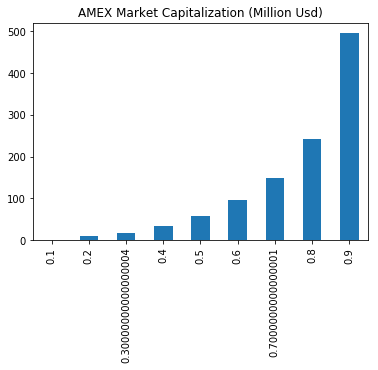

In [ ]:
title="AMEX Market Capitalization (Million Usd)"
mc.quantile(dec).plot(kind='bar',title=title)
plt.tight_layout
plt.show()

In [ ]:
mc.describe()

count      310.000000
mean       384.565963
std       2015.715030
min          0.000000
25%         12.470699
50%         57.321627
75%        196.277101
max      21859.874046
Name: MarketCap, dtype: float64

In [ ]:
mc.describe(percentiles=np.arange(.1,.91,.1))

count      310.000000
mean       384.565963
std       2015.715030
min          0.000000
10%          0.000000
20%          8.569657
30.0%       17.787227
40%         34.492401
50%         57.321627
60%         94.860905
70%        149.736585
80%        242.271626
90%        496.352003
max      21859.874046
Name: MarketCap, dtype: float64

A quantile is a measure of dispersion created by dividing a frequency distribution of a DataFrame into even groups.

In [ ]:
# Calculate mean
mean = income['Income per Capita'].mean()

# Calculate standard deviation
std = income['Income per Capita'].std()

# Calculate and print lower and upper bounds
bounds = [mean-std, std+mean]
print(bounds)

# Calculate and print first and third quartiles
quantiles = income['Income per Capita'].quantile([0.25, 0.75])
print(quantiles)

# Calculate and print IQR
#iqr = 0.75 - 0.25
#print(iqr)
# Calculate and print IQR
iqr = quantiles[0.75] - quantiles[0.25]
print(iqr)

In [ ]:
[-2497.4416414691186, 41436.280772943035]
0.25     3922.35894
0.75    26558.75467
Name: Income per Capita, dtype: float64
0.5


In [ ]:
 [-2497.4416414691186, 41436.280772943035]
    0.25     3922.35894
    0.75    26558.75467
    Name: Income per Capita, dtype: float64
    22636.39573


A decile is a special kind of quantile obtained by dividing the distribution of a particular dataset by ten. Deciles (as well as any other kind of quantile) can be created by supplying the following numpy function to .quantile(), where start is the beginning of the interval (inclusive), stop is the end of the interval (exclusive), and step is the spacing between any two adjacent values:

In [ ]:
# Generate range of deciles
quantiles = np.arange(.1, .91, .1)

# Print them
print(quantiles)

# Calculate deciles for 'Income per Capita'
deciles = income['Income per Capita'].quantile(quantiles)

# Print them
print(deciles)

# Plot deciles as a bar chart
deciles.plot(kind='bar', title='Global Income per Capita - Deciles')

# Make sure to use the tight layout!
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
<script.py> output:
    [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
    0.1     1805.906426
    0.2     3177.255688
    0.3     5506.323195
    0.4     8510.729683
    0.5    11620.932520
    0.6    15790.369076
    0.7    22563.075646
    0.8    32517.693902
    0.9    47377.886804
    Name: Income per Capita, dtype: float64


In [ ]:
image.svg

You can retrieve all major central tendency, dispersion, and shape statistics of a distribution at once with the pandas .describe() method. The default value of its optional percentiles argument corresponds with quartiles, but you can supply your own list of percentiles

In [ ]:
1]: income['Income per Capita'].describe()
Out[1]:
count       184.000000
mean      19469.419566
std       21966.861207
min         618.752859
25%        3922.358940
50%       11620.932520
75%       26558.754670
max      141542.662800
Name: Income per Capita, dtype: float64


In [ ]:
In [10]: income['Income per Capita'].describe(percentiles=np.arange(.1,.91,.1))
Out[10]:
count       184.000000
mean      19469.419566
std       21966.861207
min         618.752859
10%        1805.906426
20%        3177.255688
30.0%      5506.323195
40%        8510.729683
50%       11620.932520
60%       15790.369076
70%       22563.075646
80%       32517.693902
90%       47377.886804
max      141542.662800
Name: Income per Capita, dtype: float64
